# 📊 Complete Financial Transaction Analysis & Forecasting (Tunisia)

## End-to-End Data Science Pipeline

This comprehensive notebook includes:
1. ✅ **Data Loading & Exploration**
2. ✅ **Currency Conversion** (INR → TND)
3. ✅ **Data Cleaning & Preprocessing**
4. ✅ **Exploratory Data Analysis**
5. ✅ **Feature Engineering**
6. ✅ **Machine Learning Models**
7. ✅ **Prophet Forecasting with Tunisian Holidays**
8. ✅ **Insights & Recommendations**

---

### Tunisian Holidays Included:
- 🎓 **Back to School**: September 15
- 🌙 **Ramadan**: February 19
- 🎉 **Eid al-Fitr**: April 20
- 🐑 **Eid al-Adha**: June 27
- ☀️ **Summer Period**: July-August
- 🎆 **New Year**: January 1

## 1. Import Libraries

In [171]:
# Core Libraries
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Time Series Forecasting with Prophet
try:
    from prophet import Prophet
    from prophet.plot import plot_plotly, plot_components_plotly
    from prophet.diagnostics import cross_validation, performance_metrics
    PROPHET_AVAILABLE = True
    print("✓ Prophet library loaded successfully!")
except ImportError:
    print("⚠ Prophet not installed. Install it with: pip install prophet")
    PROPHET_AVAILABLE = False

# Set visualization styles
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
%matplotlib inline

print("\n" + "="*80)
print("ALL LIBRARIES IMPORTED SUCCESSFULLY!")
print("="*80)

✓ Prophet library loaded successfully!

ALL LIBRARIES IMPORTED SUCCESSFULLY!


## 2. Load Dataset

In [172]:
# Load the dataset
# Replace 'financial_data.csv' with your actual filename
df = pd.read_csv('/kaggle/input/budgetwise-personal-finance-dataset/budgetwise_finance_dataset.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst 10 rows:")
df.head(10)

Dataset Shape: (15900, 9)

Columns: ['transaction_id', 'user_id', 'date', 'transaction_type', 'category', 'amount', 'payment_mode', 'location', 'notes']

First 10 rows:


,transaction_id,user_id,date,transaction_type,category,amount,payment_mode,location,notes
0,T4999,U018,2023-04-25,Expense,Educaton,3888,card,Ahmedabad,Movie tickets
1,T12828,U133,08/05/2022,Expense,rent,649,NaN,Hyderabad,asdfgh
2,T7403,U091,31-12-23,Income,Freelance,13239,Csh,BAN,Books
3,T12350,U097,NaN,Expense,Fod,6299,Bank Transfer,AHMEDABAD,Electricity bill
4,T7495,U088,10/28/2022,Expense,entertainment,2287,CARD,Hyderabad,NaN
5,T12465,U042,04/11/2024,Expense,Foods,4168,NaN,NaN,test
6,T4518,U026,08/16/2022,Expense,education,Rs.828,Crd,Lucknow,Uber ride
7,T9824,U061,2024-12-12,Income,Salary,62061,CRD,AHM,...
8,T0741,U053,13-03-24,Expense,Utilties,₹5070,upi,KOL,Grocery shopping
9,T12403,U004,11/10/2023,Income,Others,59543,UPI,LUC,Gym membership


## 3. Initial Data Exploration

In [173]:
print("="*80)
print("DATASET INFORMATION")
print("="*80)
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    15900 non-null  object
 1   user_id           15900 non-null  object
 2   date              15414 non-null  object
 3   transaction_type  15900 non-null  object
 4   category          15615 non-null  object
 5   amount            15609 non-null  object
 6   payment_mode      15092 non-null  object
 7   location          14638 non-null  object
 8   notes             13079 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [174]:
print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)
df.describe(include='all')


STATISTICAL SUMMARY


,transaction_id,user_id,date,transaction_type,category,amount,payment_mode,location,notes
count,15900,15900,15414,15900,15615,15609,15092,14638,13079
unique,14000,150,5025,2,46,11165,19,40,26
top,T8639,U036,2024-08-13,Expense,FOOD,999999,UPI,PUN,Electricity bill
freq,5,136,14,13517,583,80,939,398,561


In [175]:
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_data)


MISSING VALUES ANALYSIS
         Column  Missing_Count  Missing_Percentage
8         notes           2821               17.74
7      location           1262                7.94
6  payment_mode            808                5.08
2          date            486                3.06
5        amount            291                1.83
4      category            285                1.79


In [176]:
print("\n" + "="*80)
print("DUPLICATE ANALYSIS")
print("="*80)
duplicate_count = df['transaction_id'].duplicated().sum()
duplicate_percentage = (duplicate_count / len(df) * 100).round(2)
print(f"Duplicate Transaction IDs: {duplicate_count} ({duplicate_percentage}%)")
print(f"Unique Transaction IDs: {df['transaction_id'].nunique()}")


DUPLICATE ANALYSIS
Duplicate Transaction IDs: 1900 (11.95%)
Unique Transaction IDs: 14000


## 4. Data Cleaning & Preprocessing

### 4.1 Remove Duplicate Transaction IDs

In [177]:
print(f"Before removing duplicates: {len(df)} rows")
df = df.drop_duplicates(subset='transaction_id', keep='first')
print(f"After removing duplicates: {len(df)} rows")
print(f"Removed: {duplicate_count} duplicate transactions")

Before removing duplicates: 15900 rows
After removing duplicates: 14000 rows
Removed: 1900 duplicate transactions


### 4.2 Clean Date Column

In [178]:
def parse_date(date_str):
    """Parse dates with multiple formats"""
    if pd.isna(date_str):
        return pd.NaT
    
    formats = ['%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y', '%d-%m-%Y', '%Y/%m/%d']
    
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except:
            continue
    
    try:
        return pd.to_datetime(date_str)
    except:
        return pd.NaT

print("Parsing dates...")
df['date'] = df['date'].apply(parse_date)

unparsed_dates = df['date'].isna().sum()
print(f"Unparsed/Missing dates: {unparsed_dates} ({(unparsed_dates/len(df)*100):.2f}%)")

df = df.dropna(subset=['date'])
print(f"Dataset shape after removing missing dates: {df.shape}")

Parsing dates...
Unparsed/Missing dates: 431 (3.08%)
Dataset shape after removing missing dates: (13569, 9)


In [179]:
# Extract date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()
df['month_name'] = df['date'].dt.month_name()
df['quarter'] = df['date'].dt.quarter
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

df = df.sort_values('date').reset_index(drop=True)

print("✓ Date features extracted successfully!")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

✓ Date features extracted successfully!
Date range: 2021-01-01 00:00:00 to 2024-12-31 00:00:00


### 4.3 Clean Amount Column 


In [180]:
INR_TO_TND = 0.0036  

def clean_amount(amount):
    """Remove currency symbols and convert to float"""
    if pd.isna(amount):
        return np.nan
    
    amount_str = str(amount)
    # Remove currency symbols and separators
    amount_str = amount_str.replace('$', '').replace('€', '').replace('£', '')
    amount_str = amount_str.replace('₹', '').replace(',', '').replace(' ', '')
    
    try:
        return float(amount_str)
    except:
        return np.nan

print("Cleaning amount column...")
df['amount_inr'] = df['amount'].apply(clean_amount)  # Original in INR
df = df.dropna(subset=['amount_inr'])
df['amount_inr'] = df['amount_inr'].abs()

# Convert to Tunisian Dinars
df['amount'] = df['amount_inr'] * INR_TO_TND

print(f"\n✓ Currency converted from INR to TND")
print(f"Exchange rate used: 1 INR = {INR_TO_TND} TND")
print(f"\nAmount statistics (in TND):")
print(df['amount'].describe())

Cleaning amount column...

✓ Currency converted from INR to TND
Exchange rate used: 1 INR = 0.0036 TND

Amount statistics (in TND):
count    1.261400e+04
mean     1.977074e+04
std      2.655325e+05
min      0.000000e+00
25%      1.023930e+01
50%      2.130300e+01
75%      3.441600e+01
max      3.600000e+06
Name: amount, dtype: float64


In [181]:
# Handle outliers using IQR method
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print(f"Outliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
print(f"Lower bound: {lower_bound:.2f} TND")
print(f"Upper bound: {upper_bound:.2f} TND")

df['amount'] = df['amount'].clip(lower=max(0, lower_bound), upper=upper_bound)
print("✓ Outliers capped successfully!")

Outliers detected: 1906 (15.11%)
Lower bound: -62.29 TND
Upper bound: 106.95 TND
✓ Outliers capped successfully!


### 4.4 Clean Category Column

In [182]:
def clean_category(cat):
    """Clean category text and fix common typos"""
    if pd.isna(cat):
        return 'Unknown'
    
    cat = str(cat).strip().lower()
    
    typo_map = {
        'foo': 'food', 'foood': 'food',
        'transprt': 'transportation', 'transport': 'transportation',
        'entertanment': 'entertainment', 'entertaimnt': 'entertainment',
        'utilites': 'utilities', 'utlities': 'utilities',
        'grocry': 'grocery', 'groceries': 'grocery',
        'helth': 'health', 'healthcare': 'health',
        'educaton': 'education',
        'shoping': 'shopping',
        'clothng': 'clothing', 'clothes': 'clothing'
    }
    
    for typo, correct in typo_map.items():
        if typo in cat:
            cat = correct
            break
    
    return cat.capitalize()

print("Cleaning category column...")
df['category'] = df['category'].apply(clean_category)

print(f"\nUnique categories: {df['category'].nunique()}")
print("\nTop 10 categories:")
print(df['category'].value_counts().head(10))

Cleaning category column...

Unique categories: 27

Top 10 categories:
category
Food             2273
Rent             1311
Travel            969
Utilities         713
Education         628
Others            522
Entertainment     515
Health            485
Fod               418
Rentt             411
Name: count, dtype: int64


### 4.5 Clean Payment Mode Column

In [183]:
def clean_payment_mode(mode):
    """Clean payment mode and expand abbreviations"""
    if pd.isna(mode):
        return 'Unknown'
    
    mode = str(mode).strip().lower()
    
    payment_map = {
        'cc': 'credit card', 'creditcard': 'credit card', 'credit': 'credit card',
        'dc': 'debit card', 'debitcard': 'debit card', 'debit': 'debit card',
        'csh': 'cash', 'cach': 'cash',
        'upi': 'upi',
        'netbanking': 'net banking', 'net banking': 'net banking',
        'wallet': 'digital wallet', 'ewallet': 'digital wallet',
        'paytm': 'digital wallet', 'gpay': 'digital wallet', 'phonepe': 'digital wallet',
        'cheque': 'cheque', 'check': 'cheque'
    }
    
    for key, value in payment_map.items():
        if key in mode:
            return value.capitalize()
    
    return mode.capitalize()

print("Cleaning payment_mode column...")
df['payment_mode'] = df['payment_mode'].apply(clean_payment_mode)

print(f"\nUnique payment modes: {df['payment_mode'].nunique()}")
print("\nPayment mode distribution:")
print(df['payment_mode'].value_counts())

Cleaning payment_mode column...

Unique payment modes: 9

Payment mode distribution:
payment_mode
Cash             2971
Upi              2933
Card             1843
Crd              1209
Bank transfer    1206
Bank transfr      642
Unknown           631
Bank_transfer     594
Banktransfer      585
Name: count, dtype: int64


### 4.6 Clean Location & Transaction Type

In [184]:
def clean_location(loc):
    if pd.isna(loc):
        return 'Unknown'
    return str(loc).strip().title()

df['location'] = df['location'].apply(clean_location)
df['transaction_type'] = df['transaction_type'].str.strip().str.capitalize()

print("✓ Location and transaction type cleaned!")

✓ Location and transaction type cleaned!


In [185]:
def clean_notes(note):
    if pd.isna(note):
        return ''
    note = str(note).strip()
    note = re.sub(r'[^a-zA-Z0-9\s.,!?-]', '', note)
    note = ' '.join(note.split())
    return note

df['notes'] = df['notes'].apply(clean_notes)
print("✓ Notes cleaned!")

✓ Notes cleaned!


In [186]:
print("\n" + "="*80)
print("CLEANED DATASET SUMMARY")
print("="*80)
print(f"\nFinal shape: {df.shape}")
print(f"\nCurrency: Tunisian Dinars (TND)")
print(f"Total amount (TND): {df['amount'].sum():,.2f}")
print(f"Average amount (TND): {df['amount'].mean():.2f}")
print("\n✓ DATA CLEANING COMPLETED!")
df.head()


CLEANED DATASET SUMMARY

Final shape: (12614, 18)

Currency: Tunisian Dinars (TND)
Total amount (TND): 432,072.50
Average amount (TND): 34.25

✓ DATA CLEANING COMPLETED!


,transaction_id,user_id,date,transaction_type,category,amount,payment_mode,location,notes,year,month,day,day_of_week,day_name,month_name,quarter,is_weekend,amount_inr
0,T7977,U147,2021-01-01,Expense,Travl,22.9716,Card,Jaipur,Gym membership,2021,1,1,4,Friday,January,1,0,6381.0
1,T0235,U093,2021-01-01,Expense,Utilities,23.6664,Unknown,Delhi,ATM withdrawal,2021,1,1,4,Friday,January,1,0,6574.0
2,T2465,U098,2021-01-01,Expense,Rent,45.0072,Cash,Bangalore,!!!,2021,1,1,4,Friday,January,1,0,12502.0
3,T6359,U004,2021-01-01,Expense,Food,10.5804,Bank transfr,Mumbai,,2021,1,1,4,Friday,January,1,0,2939.0
4,T2971,U138,2021-01-01,Expense,Rnt,5.6700,Bank transfer,Luc,Doctor consultation,2021,1,1,4,Friday,January,1,0,1575.0


## 5. Exploratory Data Analysis (EDA)

In [187]:
# Transaction Type Analysis
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Transaction Type Distribution', 'Transaction Type by Amount (TND)'),
    specs=[[{'type': 'pie'}, {'type': 'bar'}]]
)

type_counts = df['transaction_type'].value_counts()
fig.add_trace(
    go.Pie(labels=type_counts.index, values=type_counts.values, hole=0.3),
    row=1, col=1
)

type_amounts = df.groupby('transaction_type')['amount'].sum().sort_values(ascending=False)
fig.add_trace(
    go.Bar(x=type_amounts.index, y=type_amounts.values, marker_color=['#FF6B6B', '#4ECDC4']),
    row=1, col=2
)

fig.update_layout(height=400, showlegend=False, title_text="Transaction Type Analysis")
fig.show()

In [188]:
# Category Analysis
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Top 10 Categories by Count', 'Top 10 Categories by Amount (TND)')
)

top_categories_count = df['category'].value_counts().head(10)
fig.add_trace(
    go.Bar(x=top_categories_count.values, y=top_categories_count.index, 
           orientation='h', marker_color='lightblue'),
    row=1, col=1
)

top_categories_amount = df.groupby('category')['amount'].sum().sort_values(ascending=False).head(10)
fig.add_trace(
    go.Bar(x=top_categories_amount.values, y=top_categories_amount.index, 
           orientation='h', marker_color='lightcoral'),
    row=1, col=2
)

fig.update_layout(height=500, showlegend=False, title_text="Category Analysis")
fig.show()

In [189]:
# Daily transaction trends
daily_transactions = df.groupby('date').agg({
    'amount': 'sum',
    'transaction_id': 'count'
}).reset_index()
daily_transactions.columns = ['date', 'total_amount', 'transaction_count']

fig = px.line(daily_transactions, x='date', y='total_amount',
              title='Daily Transaction Amount (TND)',
              labels={'date': 'Date', 'total_amount': 'Total Amount (TND)'})
fig.update_traces(line_color='#FF6B6B', line_width=2)
fig.show()

## 6. Feature Engineering

In [190]:
df_model = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['transaction_type', 'category', 'payment_mode', 'location', 'user_id']

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col + '_encoded'] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Create rolling features
df_model = df_model.sort_values('date')
df_model['rolling_mean_7d'] = df_model.groupby('user_id')['amount'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)
df_model['rolling_std_7d'] = df_model.groupby('user_id')['amount'].transform(
    lambda x: x.rolling(window=7, min_periods=1).std()
)

# User-level aggregations
user_stats = df_model.groupby('user_id')['amount'].agg(['mean', 'std', 'min', 'max']).reset_index()
user_stats.columns = ['user_id', 'user_avg_amount', 'user_std_amount', 'user_min_amount', 'user_max_amount']
df_model = df_model.merge(user_stats, on='user_id', how='left')

df_model['rolling_std_7d'].fillna(0, inplace=True)
df_model['user_std_amount'].fillna(0, inplace=True)

print("✓ Feature engineering completed!")
print(f"Total features: {df_model.shape[1]}")

✓ Feature engineering completed!
Total features: 29


## 7. Machine Learning Models

In [191]:
feature_cols = [
    'transaction_type_encoded', 'category_encoded', 'payment_mode_encoded', 
    'location_encoded', 'user_id_encoded',
    'year', 'month', 'day', 'day_of_week', 'quarter', 'is_weekend',
    'rolling_mean_7d', 'rolling_std_7d',
    'user_avg_amount', 'user_std_amount', 'user_min_amount', 'user_max_amount'
]

X = df_model[feature_cols]
y = df_model['amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (10091, 17)
Test set: (2523, 17)


In [192]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
}

results = {}
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training models...\n")
for name, model in models.items():
    print(f"Training {name}...")
    
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'predictions': y_pred}
    print(f"  RMSE: {rmse:.2f} TND | MAE: {mae:.2f} TND | R²: {r2:.4f}\n")

print("✓ Model training completed!")

Training models...

Training Linear Regression...
  RMSE: 22.20 TND | MAE: 14.61 TND | R²: 0.5833

Training Decision Tree...
  RMSE: 19.38 TND | MAE: 12.04 TND | R²: 0.6824

Training Random Forest...
  RMSE: 17.98 TND | MAE: 11.69 TND | R²: 0.7268

Training Gradient Boosting...
  RMSE: 17.92 TND | MAE: 11.79 TND | R²: 0.7285

✓ Model training completed!


In [193]:
results_df = pd.DataFrame(results).T[['RMSE', 'MAE', 'R2']].sort_values('R2', ascending=False)

print("="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(results_df)

fig = go.Figure()
fig.add_trace(go.Bar(x=results_df.index, y=results_df['R2'], marker_color='lightblue'))
fig.update_layout(title='Model Performance (R² Score)', xaxis_title='Model', yaxis_title='R² Score')
fig.show()

MODEL PERFORMANCE COMPARISON
                        RMSE        MAE        R2
Gradient Boosting  17.919627  11.788439  0.728545
Random Forest      17.976299  11.688072  0.726825
Decision Tree      19.384066  12.043399  0.682364
Linear Regression  22.202889  14.610631  0.583266


## 8. Prophet Forecasting with Tunisian Holidays

### Tunisian Holidays & Events:
- 🎆 **New Year**: January 1
- 🌙 **Ramadan**: February 19
- 🎉 **Eid al-Fitr**: April 20
- 🐑 **Eid al-Adha**: June 27
- ☀️ **Summer Period**: July 1 - August 31
- 🎓 **Back to School**: September 15

### 8.1 Prepare Data for Prophet

In [194]:
if not PROPHET_AVAILABLE:
    print("⚠ Prophet not available. Skipping forecasting section.")
else:
    prophet_df = df.groupby('date')['amount'].sum().reset_index()
    prophet_df.columns = ['ds', 'y']
    prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
    prophet_df['floor'] = 0

    print(f"✓ Prophet dataset: {prophet_df.shape}")
    print(f"Date range: {prophet_df['ds'].min()} to {prophet_df['ds'].max()}")
    
    fig = px.line(prophet_df, x='ds', y='y',
                  title='Daily Transaction Amount (TND) - Time Series',
                  labels={'ds': 'Date', 'y': 'Total Amount (TND)'})
    fig.update_traces(line_color='#FF6B6B', line_width=2)
    fig.show()

✓ Prophet dataset: (1461, 3)
Date range: 2021-01-01 00:00:00 to 2024-12-31 00:00:00


### 8.2 Define Tunisian Holidays

In [195]:
if PROPHET_AVAILABLE:
    # Create holidays dataframe for multiple years
    years = range(2020, 2028)  # Adjust based on your data range
    
    holidays_list = []
    
    for year in years:
        # New Year
        holidays_list.append({
            'holiday': 'new_year',
            'ds': pd.to_datetime(f'{year}-01-01'),
            'lower_window': -1,
            'upper_window': 1
        })
        
        # Ramadan (February 19)
        holidays_list.append({
            'holiday': 'ramadan',
            'ds': pd.to_datetime(f'{year}-02-19'),
            'lower_window': -3,
            'upper_window': 30  # Ramadan lasts ~30 days
        })
        
        # Eid al-Fitr (April 20)
        holidays_list.append({
            'holiday': 'eid_al_fitr',
            'ds': pd.to_datetime(f'{year}-04-20'),
            'lower_window': -1,
            'upper_window': 3
        })
        
        # Eid al-Adha (June 27)
        holidays_list.append({
            'holiday': 'eid_al_adha',
            'ds': pd.to_datetime(f'{year}-06-27'),
            'lower_window': -1,
            'upper_window': 4
        })
        
        # Summer Period (July 1 - August 31)
        # Add multiple dates throughout summer
        for day in range(1, 62, 7):  # Every week in summer
            summer_date = pd.to_datetime(f'{year}-07-01') + pd.Timedelta(days=day)
            if summer_date.month in [7, 8]:
                holidays_list.append({
                    'holiday': 'summer_period',
                    'ds': summer_date,
                    'lower_window': 0,
                    'upper_window': 0
                })
        
        # Back to School (September 15)
        holidays_list.append({
            'holiday': 'back_to_school',
            'ds': pd.to_datetime(f'{year}-09-15'),
            'lower_window': -7,
            'upper_window': 7
        })
    
    tunisian_holidays = pd.DataFrame(holidays_list)
    
    print("✓ Tunisian holidays defined!")
    print(f"\nTotal holiday entries: {len(tunisian_holidays)}")
    print("\nHolidays included:")
    print(tunisian_holidays.groupby('holiday').size())
    print("\nSample holidays:")
    display(tunisian_holidays.head(10))

✓ Tunisian holidays defined!

Total holiday entries: 112

Holidays included:
holiday
back_to_school     8
eid_al_adha        8
eid_al_fitr        8
new_year           8
ramadan            8
summer_period     72
dtype: int64

Sample holidays:


,holiday,ds,lower_window,upper_window
0,new_year,2020-01-01,-1,1
1,ramadan,2020-02-19,-3,30
2,eid_al_fitr,2020-04-20,-1,3
3,eid_al_adha,2020-06-27,-1,4
4,summer_period,2020-07-02,0,0
5,summer_period,2020-07-09,0,0
6,summer_period,2020-07-16,0,0
7,summer_period,2020-07-23,0,0
8,summer_period,2020-07-30,0,0
9,summer_period,2020-08-06,0,0


### 8.3 Train Prophet Model with Holidays

In [196]:
if PROPHET_AVAILABLE:
    print("Training Prophet model with Tunisian holidays...")
    
    model = Prophet(
        holidays=tunisian_holidays,
        daily_seasonality=False,
        weekly_seasonality=True,
        yearly_seasonality=True,
        seasonality_mode='multiplicative',  # CHANGED: multiplicative prevents negatives better
        changepoint_prior_scale=0.05,
        holidays_prior_scale=10.0,
        interval_width=0.95
    )
    
    model.fit(prophet_df)
    print("✓ Prophet model trained successfully with Tunisian holidays!")

Training Prophet model with Tunisian holidays...


20:37:45 - cmdstanpy - INFO - Chain [1] start processing
20:37:46 - cmdstanpy - INFO - Chain [1] done processing


✓ Prophet model trained successfully with Tunisian holidays!


### 8.4 Make Future Predictions

In [197]:
if PROPHET_AVAILABLE:
    future_days = 90  # Forecast 90 days to capture seasonal patterns
    future = model.make_future_dataframe(periods=future_days, freq='D')
    forecast = model.predict(future)
    forecast['yhat'] = forecast['yhat'].clip(lower=0)
    forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=0)
    forecast['yhat_upper'] = forecast['yhat_upper'].clip(lower=0)
    print(f"✓ Forecast created for {future_days} days")
    print(f"Total dates: {len(forecast)}")
    print("\nLast 10 predictions:")
    display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

✓ Forecast created for 90 days
Total dates: 1551

Last 10 predictions:


,ds,yhat,yhat_lower,yhat_upper
1541,2025-03-22,261.175155,0.000000,522.402472
1542,2025-03-23,267.435086,0.000000,553.486867
1543,2025-03-24,271.256717,0.000000,552.208411
1544,2025-03-25,247.239817,0.000000,530.554929
1545,2025-03-26,240.065037,0.000000,515.236244
1546,2025-03-27,268.229381,0.000000,550.502046
1547,2025-03-28,270.370026,8.409290,551.633559
1548,2025-03-29,264.560367,0.000000,529.285291
1549,2025-03-30,277.413242,0.000000,567.669429
1550,2025-03-31,287.719367,2.146387,565.064191


### 8.5 Visualize Forecast with Holidays

In [198]:
if PROPHET_AVAILABLE:
    fig = plot_plotly(model, forecast)
    fig.update_layout(
        title='Transaction Amount Forecast (TND) - Next 90 Days with Tunisian Holidays',
        xaxis_title='Date',
        yaxis_title='Amount (TND)',
        height=600
    )
    fig.show()

### 8.6 Analyze Forecast Components (Including Holiday Effects)

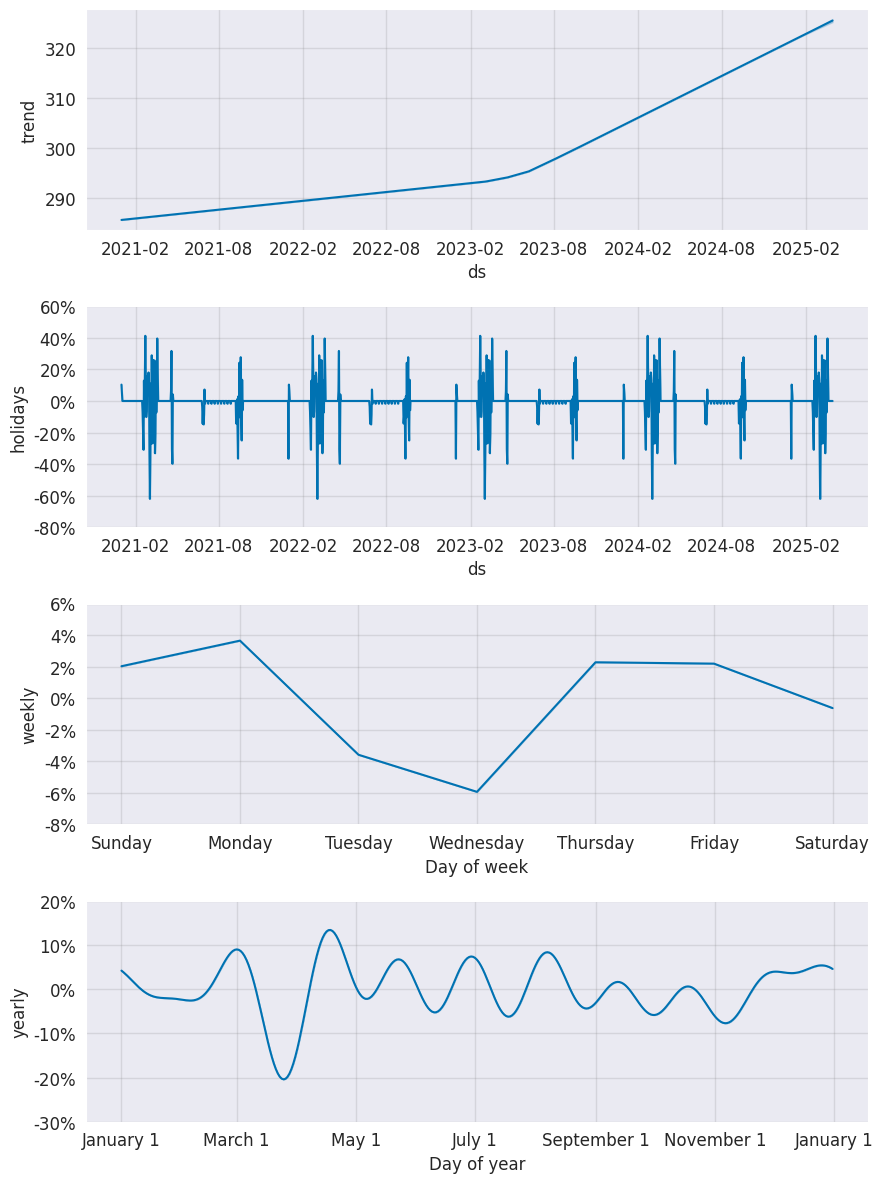

In [199]:
if PROPHET_AVAILABLE:
    fig = model.plot_components(forecast)
    plt.tight_layout()
    plt.show()

In [200]:
if PROPHET_AVAILABLE:
    fig = plot_components_plotly(model, forecast)
    fig.update_layout(height=1000)
    fig.show()

### 8.7 Holiday Impact Analysis

In [201]:
if PROPHET_AVAILABLE:
    # Extract holiday effects from forecast
    holiday_cols = [col for col in forecast.columns if col.endswith('_lower') or col.endswith('_upper') or 
                    col in ['new_year', 'ramadan', 'eid_al_fitr', 'eid_al_adha', 'summer_period', 'back_to_school']]
    
    # Get holidays column if it exists
    if 'holidays' in forecast.columns:
        holiday_impact = forecast[['ds', 'holidays']].copy()
        holiday_impact = holiday_impact[holiday_impact['holidays'].notna()]
        
        print("="*80)
        print("HOLIDAY IMPACT ANALYSIS")
        print("="*80)
        print(f"\nAverage holiday effect: {holiday_impact['holidays'].mean():.2f} TND")
        print(f"Maximum holiday effect: {holiday_impact['holidays'].max():.2f} TND")
        print(f"Minimum holiday effect: {holiday_impact['holidays'].min():.2f} TND")
    
    # Identify upcoming holidays in forecast
    future_pred = forecast[forecast['ds'] > prophet_df['ds'].max()].copy()
    future_holidays = tunisian_holidays[tunisian_holidays['ds'] > prophet_df['ds'].max()]
    
    print(f"\n📅 Upcoming Holidays in Forecast Period:")
    print("-" * 80)
    for _, holiday in future_holidays.head(10).iterrows():
        holiday_date = holiday['ds']
        holiday_name = holiday['holiday']
        # Find forecast for this date
        forecast_row = forecast[forecast['ds'] == holiday_date]
        if not forecast_row.empty:
            predicted_amount = forecast_row['yhat'].values[0]
            print(f"{holiday_date.strftime('%Y-%m-%d')}: {holiday_name.replace('_', ' ').title()} - Predicted: {predicted_amount:.2f} TND")

HOLIDAY IMPACT ANALYSIS

Average holiday effect: -0.00 TND
Maximum holiday effect: 0.41 TND
Minimum holiday effect: -0.62 TND

📅 Upcoming Holidays in Forecast Period:
--------------------------------------------------------------------------------
2025-01-01: New Year - Predicted: 349.17 TND
2025-02-19: Ramadan - Predicted: 356.22 TND


### 8.8 Model Performance

In [202]:
if PROPHET_AVAILABLE:
    historical = forecast[forecast['ds'] <= prophet_df['ds'].max()].copy()
    future_pred = forecast[forecast['ds'] > prophet_df['ds'].max()].copy()
    
    evaluation = prophet_df.merge(historical[['ds', 'yhat']], on='ds', how='left')
    
    mae = mean_absolute_error(evaluation['y'], evaluation['yhat'])
    rmse = np.sqrt(mean_squared_error(evaluation['y'], evaluation['yhat']))
    mape = np.mean(np.abs((evaluation['y'] - evaluation['yhat']) / evaluation['y'])) * 100
    
    print("="*80)
    print("PROPHET MODEL PERFORMANCE (with Tunisian Holidays)")
    print("="*80)
    print(f"MAE: {mae:.2f} TND")
    print(f"RMSE: {rmse:.2f} TND")
    print(f"MAPE: {mape:.2f}%")
    
    # Actual vs Predicted
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=evaluation['ds'], y=evaluation['y'],
                             mode='lines', name='Actual', line=dict(color='#FF6B6B', width=2)))
    fig.add_trace(go.Scatter(x=evaluation['ds'], y=evaluation['yhat'],
                             mode='lines', name='Predicted', line=dict(color='#4ECDC4', width=2, dash='dash')))
    fig.update_layout(title='Actual vs Predicted (TND)', height=500, hovermode='x unified')
    fig.show()

PROPHET MODEL PERFORMANCE (with Tunisian Holidays)
MAE: 111.43 TND
RMSE: 140.16 TND
MAPE: 70.86%


### 8.9 Future Forecast Summary

In [203]:
if PROPHET_AVAILABLE:
    print("="*80)
    print(f"NEXT {future_days} DAYS FORECAST (TND)")
    print("="*80)
    
    print(f"\nAverage predicted: {future_pred['yhat'].mean():.2f} TND")
    print(f"Total predicted: {future_pred['yhat'].sum():,.2f} TND")
    print(f"Min: {future_pred['yhat'].min():.2f} TND")
    print(f"Max: {future_pred['yhat'].max():.2f} TND")
    
    print(f"\n📊 Top 10 Highest Predicted Days:")
    top_days = future_pred.nlargest(10, 'yhat')[['ds', 'yhat']]
    for idx, row in top_days.iterrows():
        print(f"{row['ds'].strftime('%Y-%m-%d')}: {row['yhat']:.2f} TND")

NEXT 90 DAYS FORECAST (TND)

Average predicted: 315.99 TND
Total predicted: 28,439.12 TND
Min: 138.01 TND
Max: 473.56 TND

📊 Top 10 Highest Predicted Days:
2025-02-22: 473.56 TND
2025-03-08: 430.14 TND
2025-02-27: 410.84 TND
2025-03-01: 409.83 TND
2025-03-20: 406.43 TND
2025-02-21: 402.78 TND
2025-03-02: 402.47 TND
2025-02-23: 400.61 TND
2025-03-11: 395.63 TND
2025-03-14: 395.03 TND


## 9. Export Results

In [204]:
# Save cleaned data
df.to_csv('financial_data_cleaned_tnd.csv', index=False)
print("✓ Cleaned data saved: 'financial_data_cleaned_tnd.csv'")

# Save model features
df_model.to_csv('financial_data_features_tnd.csv', index=False)
print("✓ Feature data saved: 'financial_data_features_tnd.csv'")

# Save Prophet forecast
if PROPHET_AVAILABLE:
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('prophet_forecast_tunisia.csv', index=False)
    print("✓ Prophet forecast saved: 'prophet_forecast_tunisia.csv'")
    
    future_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('prophet_future_90days_tunisia.csv', index=False)
    print("✓ Future predictions saved: 'prophet_future_90days_tunisia.csv'")
    
    tunisian_holidays.to_csv('tunisian_holidays.csv', index=False)
    print("✓ Tunisian holidays saved: 'tunisian_holidays.csv'")

print("\n" + "="*80)
print("✓ ALL RESULTS EXPORTED SUCCESSFULLY!")
print("="*80)

✓ Cleaned data saved: 'financial_data_cleaned_tnd.csv'
✓ Feature data saved: 'financial_data_features_tnd.csv'
✓ Prophet forecast saved: 'prophet_forecast_tunisia.csv'
✓ Future predictions saved: 'prophet_future_90days_tunisia.csv'
✓ Tunisian holidays saved: 'tunisian_holidays.csv'

✓ ALL RESULTS EXPORTED SUCCESSFULLY!


## 10. Key Insights & Recommendations

In [205]:
print("="*80)
print("KEY INSIGHTS & RECOMMENDATIONS (Tunisia)")
print("="*80)

expense_pct = (df[df['transaction_type']=='Expense'].shape[0] / len(df) * 100)
print(f"\n📊 DATASET OVERVIEW:")
print(f"   Currency: Tunisian Dinars (TND)")
print(f"   Total transactions: {len(df):,}")
print(f"   Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"   Expense ratio: {expense_pct:.1f}%")
print(f"   Total amount: {df['amount'].sum():,.2f} TND")
print(f"   Average transaction: {df['amount'].mean():.2f} TND")

top_category = df['category'].value_counts().index[0]
top_payment = df['payment_mode'].value_counts().index[0]
print(f"\n🎯 TOP PATTERNS:")
print(f"   Most common category: {top_category}")
print(f"   Preferred payment: {top_payment}")

best_model = results_df.index[0]
print(f"\n🤖 BEST ML MODEL:")
print(f"   Model: {best_model}")
print(f"   R² Score: {results_df.loc[best_model, 'R2']:.4f}")
print(f"   RMSE: {results_df.loc[best_model, 'RMSE']:.2f} TND")

if PROPHET_AVAILABLE:
    trend_start = forecast['trend'].iloc[0]
    trend_end = forecast['trend'].iloc[-1]
    trend_change = ((trend_end - trend_start) / trend_start) * 100
    
    print(f"\n📈 PROPHET FORECAST (with Tunisian Holidays):")
    print(f"   Trend direction: {'📈 Increasing' if trend_change > 0 else '📉 Decreasing'}")
    print(f"   Trend change: {trend_change:+.2f}%")
    print(f"   Next 90 days total: {future_pred['yhat'].sum():,.2f} TND")
    print(f"   Model MAPE: {mape:.2f}%")
    print(f"   Holidays included: New Year, Ramadan, Eid al-Fitr, Eid al-Adha, Summer, Back to School")

print(f"\n💡 RECOMMENDATIONS:")
print(f"   1. Monitor {top_category} category closely (highest volume)")
print(f"   2. Optimize {top_payment} payment processing")
print(f"   3. Use {best_model} for amount predictions")
if PROPHET_AVAILABLE:
    print(f"   4. Plan for increased activity during Ramadan and Eid periods")
    print(f"   5. Prepare inventory for Back to School (Sept 15) surge")
    print(f"   6. Adjust staffing for summer period (July-August)")
    if trend_change > 5:
        print(f"   7. Prepare for increasing transaction volumes")
    elif trend_change < -5:
        print(f"   7. Investigate decreasing transaction trend")

print("\n" + "="*80)
print("✓ ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*80)

KEY INSIGHTS & RECOMMENDATIONS (Tunisia)

📊 DATASET OVERVIEW:
   Currency: Tunisian Dinars (TND)
   Total transactions: 12,614
   Date range: 2021-01-01 to 2024-12-31
   Expense ratio: 84.9%
   Total amount: 432,072.50 TND
   Average transaction: 34.25 TND

🎯 TOP PATTERNS:
   Most common category: Food
   Preferred payment: Cash

🤖 BEST ML MODEL:
   Model: Gradient Boosting
   R² Score: 0.7285
   RMSE: 17.92 TND

📈 PROPHET FORECAST (with Tunisian Holidays):
   Trend direction: 📈 Increasing
   Trend change: +13.95%
   Next 90 days total: 28,439.12 TND
   Model MAPE: 70.86%
   Holidays included: New Year, Ramadan, Eid al-Fitr, Eid al-Adha, Summer, Back to School

💡 RECOMMENDATIONS:
   1. Monitor Food category closely (highest volume)
   2. Optimize Cash payment processing
   3. Use Gradient Boosting for amount predictions
   4. Plan for increased activity during Ramadan and Eid periods
   5. Prepare inventory for Back to School (Sept 15) surge
   6. Adjust staffing for summer period (Jul